# ELM463
## LAB01
### Written by Alperen Arslan

In [27]:
import numpy as np
import matplotlib.pyplot as plt

##### PGM Read

In [28]:
# Description:
#
# Read given matrix to PGM file
#
# @param[1]: Filename. It is name of PGM file that wants to read.
#
# @return[1]: Image Data. The values of image pixels.
# @return[2]: Magic Number. Magic number is identifies the file type. PGM file type is P5. Default define is P5.
# @return[3]: Width. Width value of the image.
# @return[4]: Height. Height value of the image.
# @return[5]: Resolution. The value of maximum pixel value.
#
def pgmread(filename):
    with open(filename, 'rb') as f:
        # Read the header section
        header_lines = []
        for line in f:
            line = line.rstrip().decode('utf-8')
            if line and not line.startswith('#'):
                header_lines.append(line)
                if len(header_lines) == 3:
                    break

        # Parse the header information
        magicNum = header_lines[0]
        width, height = map(int, header_lines[1].split())
        resolution = int(header_lines[2])

        # Read the remaining data
        imageData = f.read()

    return (imageData, magicNum, width, height, resolution)

### Image Negatives (Figure 3.4)

In [29]:
# Description:
#
# Take negative of the given image without scaling
#
# @param[1]: Image. Image that want to take negative of.
# @param[2]: Resolution. The value of maximum pixel value. Default define is 255.
#
# @return[]: Image that taken negative of.
#
def imageNegative(image, resolution=255):
    # Take negative of image by subtracting the pixel value from resolution
    return resolution - image

Magic Num: P5
Width: 482
Height: 571
Resolution: 255

Image Matrix: 

[[ 23  30  32 ... 238 238 238]
 [ 38  26  39 ... 238 238 238]
 [ 35  21  43 ... 238 238 238]
 ...
 [ 31  31  29 ...  30  30  30]
 [ 31  31  29 ...  30  30  30]
 [ 31  31  29 ...  30  30  30]]

Negative of Image Matrix: 

[[232 225 223 ...  17  17  17]
 [217 229 216 ...  17  17  17]
 [220 234 212 ...  17  17  17]
 ...
 [224 224 226 ... 225 225 225]
 [224 224 226 ... 225 225 225]
 [224 224 226 ... 225 225 225]]


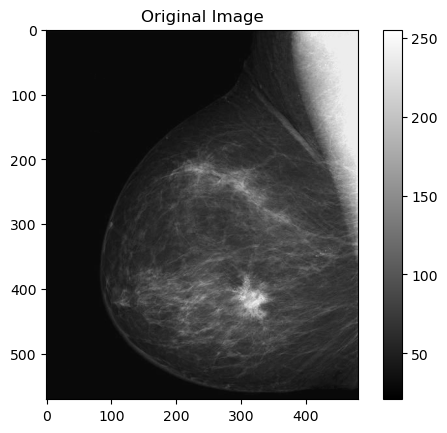

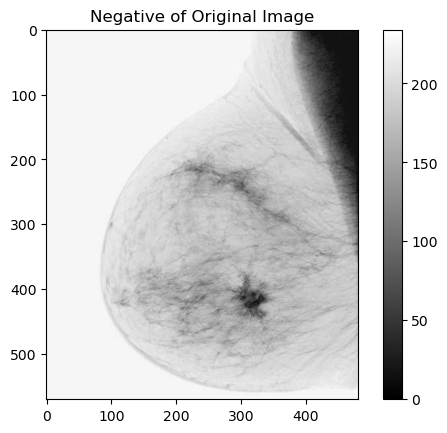

In [30]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/mammogram.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Call imageNegative function for taking negative of the image
negativeImage = imageNegative(image)

# Negative of original image byte matrix info
print('Negative of Image Matrix: \n')
print(negativeImage)

# Show image
plt.figure()
plt.title('Negative of Original Image')
plt.imshow(negativeImage, cmap="gray")
plt.colorbar()

### Log Transformations (Figure 3.5)

In [31]:
# Description:
#
# Take log transform of the given image
#
# @param[1]: Image. Image that want to take log transform of.
# @param[2]: C. Constant value to adjusting brightness of image. Default define is 1
# @param[3]: Resolution. The value of maximum pixel value. Default define is 255.
#
# @return[]: Image that taken log transform of.
#
def logTransform(image, c=1, resolution=255):
    # Take log transform of image. Add resolution parameter as multiplying factor for to scale the output (c*np.log1p(image)*resolution).
    return c * np.log1p(image) # log(1+x)

Magic Num: P5
Width: 256
Height: 256
Resolution: 255

Image Matrix: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



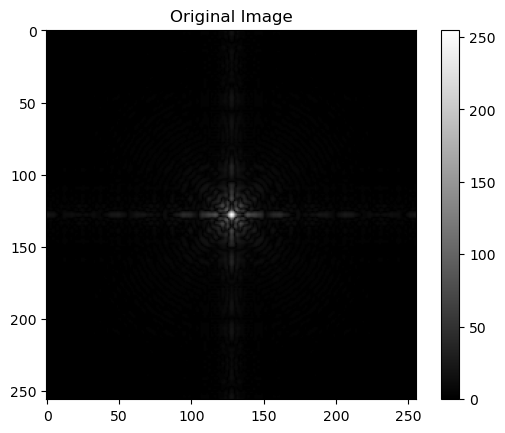

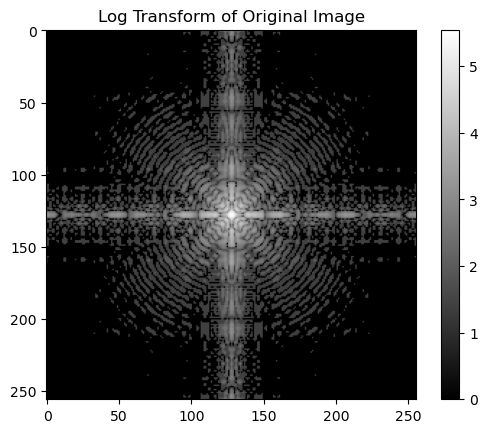

In [32]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/star.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Call logTransformImage function for taking log transform of the image
logTransformImage = logTransform(image)

# Show image
plt.figure()
plt.title('Log Transform of Original Image')
plt.imshow(logTransformImage, cmap="gray")
plt.colorbar()

### Power Law (Gamma) Transformations (Figure 3.8)

In [33]:
# Description:
#
# Take gamma transform of the given image
#
# @param[1]: Image. Image that want to take log transform of.
# @param[2]: Omega. Constant value to adjusting contrast of image.
# @param[3]: C. Constant value to adjusting brightness of image. Default define is 1
# @param[4]: Resolution. The value of maximum pixel value. Default define is 255.
#
# @return[]: Image that taken log transform of.
#
def gammaTransformation(image,omega,c=1,resolution=255):
    # Take gamma transform of image. Add resolution parameter as multiplying factor for to scale the output (c*np.log1p(image)*resolution).
    return c * np.power(image, omega)

Magic Num: P5
Width: 746
Height: 976
Resolution: 255

Image Matrix: 

[[0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]



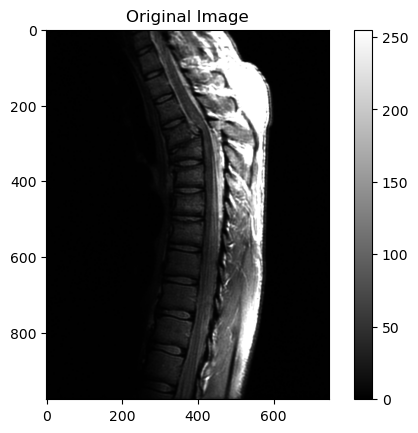

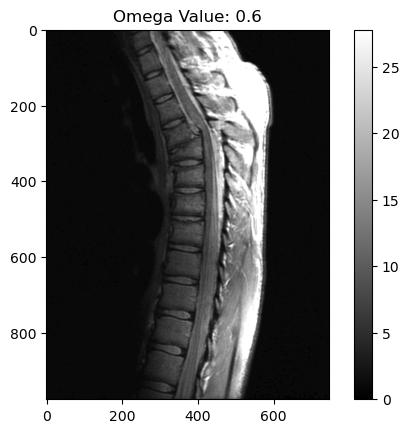

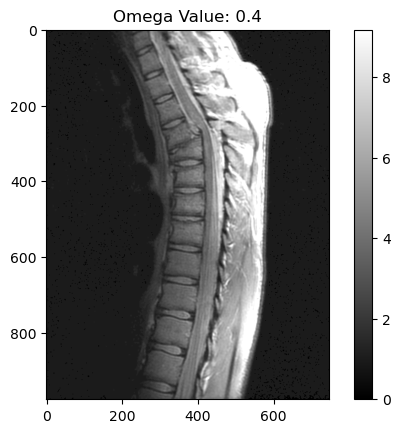

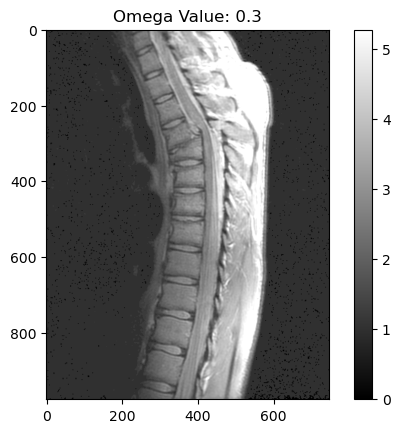

In [34]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/human_spine.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Define gamma values
gamma_values = [0.6, 0.4, 0.3]

# Iterate over gamma values and apply gamma transformation to the image
for omega in gamma_values:
    # Call gammaTransformation function to take gamma transform of image for the given gamma value
    imageGamma = gammaTransformation(image, omega)

    # Show gamma transformed image
    plt.figure()
    plt.title(f'Omega Value: {omega}')
    plt.imshow(imageGamma, cmap="gray")
    plt.colorbar()

### Spatial Linear Filters (Figure 3.33)

In [35]:
# Description:
#
# Create average filter for given size
#
# @param[1]: Height. Height value of average filter that wants to create. Must be odd number.
# @param[2]: Width. Width value of average filter that wants to create. Must be odd number.
#
# @return[]: Average filter that created.
#
def averageFilter(height,width):
    # Height and width values must be odd number.
    if height % 2 == 0 and width % 2 == 0:
        error = 'Filter dimesions must be odd number!'
        return error
    # Create and return the average filter that created if the height and width values are odd.
    return np.ones((height,width))


# Description:
#
# Smooth the given image with average filter
#
# @param[1]: Image. Image that want to smooth of.
# @param[2]: Filter. Given average filter that created from averageFilter function.
#
# @return[]: Smoothed image.
#
def imageSmoother(image, filter):
    # Take height and width values from given image and create empty smoothed image matrix
    height, width = image.shape
    imageSmoothed = np.zeros((height, width))

    # Filter length at one dimension
    filterSize = filter.shape[0]

    # Create new padded image matrix
    padNumber = filterSize // 2
    paddedImage = np.pad(image, padNumber, mode='constant')

    # Apply filter to original image's all pixels
    for i in range(height):
        for j in range(width):
            # Calculate new pixel value 
            imageSmoothed[i, j] = np.sum(paddedImage[i:i+filterSize, j:j+filterSize] * filter)

    # Normalize and round all new pixel values
    if np.sum(filter) != 0:
        imageSmoothed = np.round(imageSmoothed / np.sum(filter)).astype(int)

    # Return smoothed image
    return imageSmoothed

Magic Num: P5
Width: 500
Height: 500
Resolution: 255

Image Matrix: 

[[229 229 229 ... 229 255 255]
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 ...
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 255]]



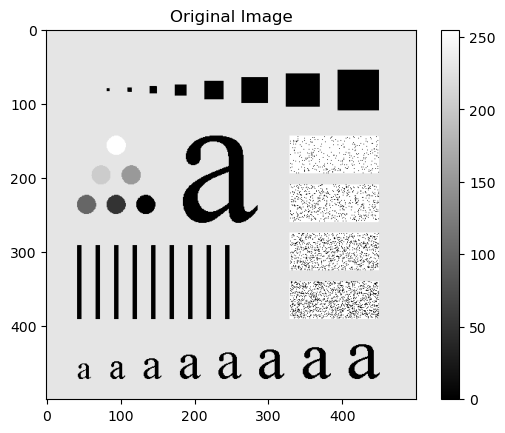

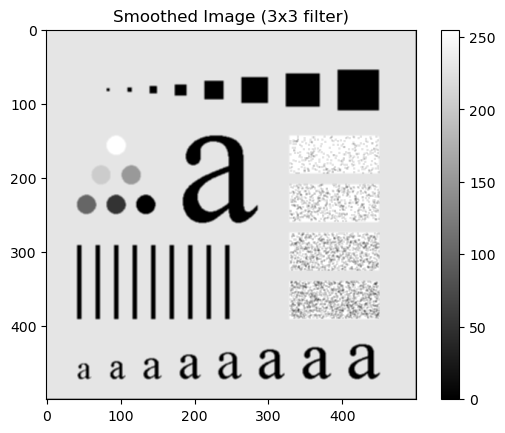

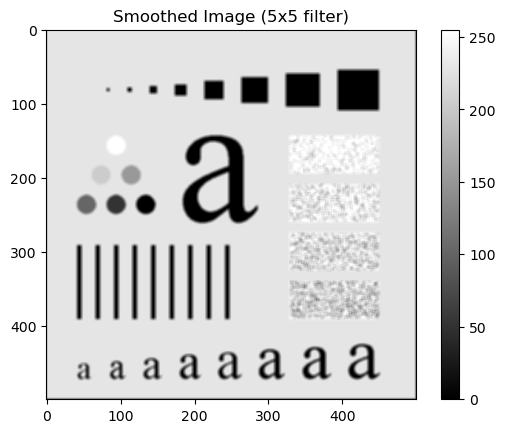

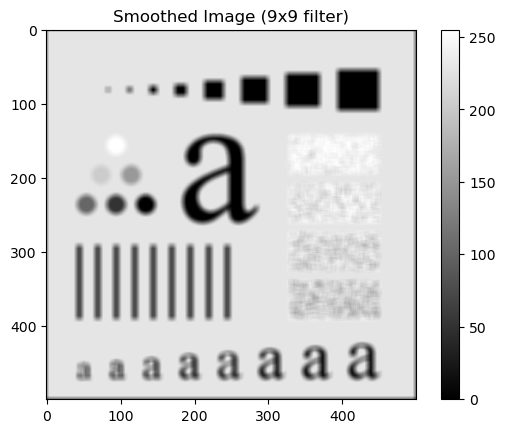

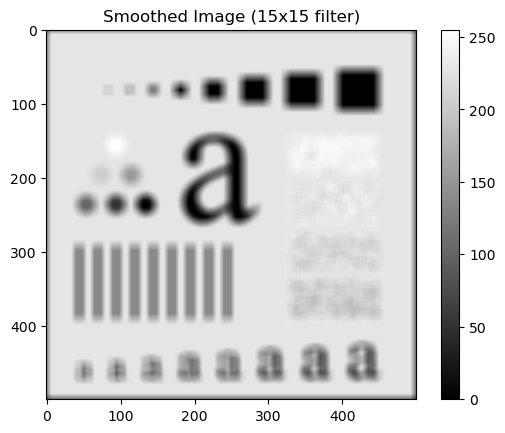

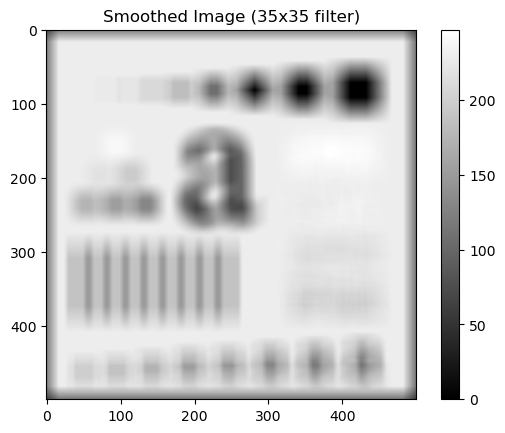

In [36]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/test_pattern.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Define filter sizes
filter_sizes = [3, 5, 9, 15, 35]

# Iterate over filter sizes and smooth the image
for size in filter_sizes:
    # Call imageSmoother function to smooth image for the given filter size
    smoothedImage = imageSmoother(image, averageFilter(size, size))

    # Show smoothed image
    plt.figure()
    plt.title(f'Smoothed Image ({size}x{size} filter)')
    plt.imshow(smoothedImage, cmap="gray")
    plt.colorbar()

### Order-Statistic (Nonlinear) Filters (Figure 3.35)

In [37]:
# Description:
#
# Apply median filter to the given image
#
# @param[1]: Image. Image that want to smooth of.
# @param[2]: Median Size. Median filter size to apply to the image.
#
# @return[]: Image that applied median filter.
#
def imageMedian(image, medianSize):
    # Median size must be odd number.
    if medianSize % 2 == 0:
        error = 'Median size must be odd number!'
        return error

    # Take height and width values from given image and create empty median image matrix
    height, width = image.shape
    imageMedian = np.zeros((height, width))

    # Create new padded image matrix
    padNumber = medianSize // 2
    paddedImage = np.pad(image, padNumber, mode='constant')

    # Apply median filter to the image for given median filter size
    for i in range(height):
        for j in range(width):
            imageMedian[i,j] = np.median(paddedImage[i:i+medianSize, j:j+medianSize])

    # Return new image matrix that median filter applied
    return imageMedian

Magic Num: P5
Width: 455
Height: 440
Resolution: 255

Image Matrix: 

[[246   0 249 ... 248 248 248]
 [247 249 250 ... 245 245 245]
 [  0 250 251 ... 243 243 255]
 ...
 [233 233 232 ... 156 150 165]
 [255 233 232 ... 157 149 165]
 [233 233 232 ... 161 150 162]]



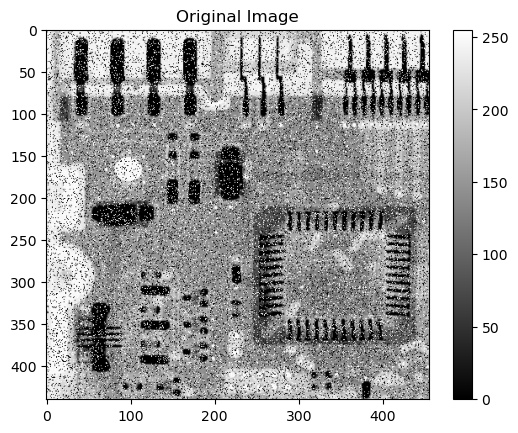

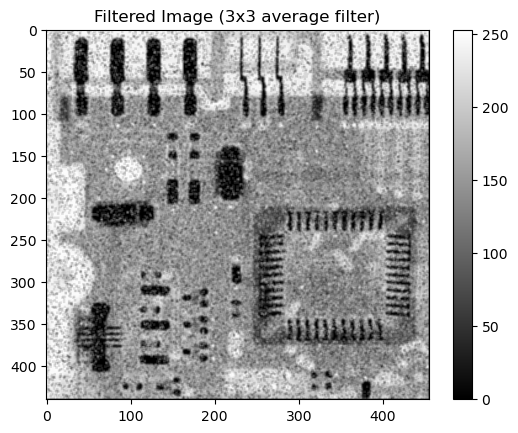

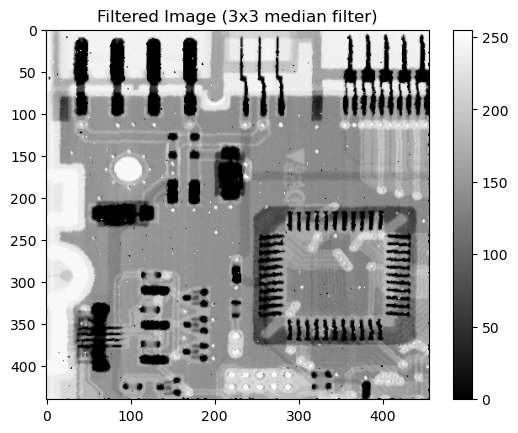

In [38]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/circuit.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# APPLY AVERAGE FILTER

# Call imageSmoother function to smooth image for (3,3) average filter
smoothedImage = imageSmoother(image,averageFilter(3,3))

# Show image
plt.figure()
plt.title('Filtered Image (3x3 average filter)')
plt.imshow(smoothedImage, cmap="gray")
plt.colorbar()

# APPLY MEDIAN FILTER

# Call imageMedian function to filter image
medianImage = imageMedian(image, 3)

# Show image
plt.figure()
plt.title('Filtered Image (3x3 median filter)')
plt.imshow(medianImage, cmap="gray")
plt.colorbar()